# Домашнее задание №2

Задание присылать на почту **aleksartmonov@gmail.com** в форматах *.ipynb* и отрендеренный результат в *.html*

В теме письма указать **HSE2018 HW2 Фролова Виктория**

soft deadline: 09.02.2018T23:59:00+0300

hard deadline: 16.02.2018T23:59:00+0300

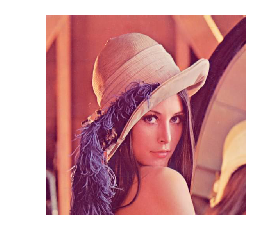

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('default')

def show(img, size=3):
    plt.figure(figsize=(size,size))
    ax = plt.axes([0,0,1,1], frameon=False)
    ax.set_axis_off()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

lena = cv2.imread("lena.jpg")
show(lena,size=2)

**1. (6 баллов)** С помощью [виджетов](http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) создайте 2 слайдера с настройками параметров гамма-коррекции. Отобразите **lena**, ее гамма-преобразование и график в диапозоне от [0;1], так, чтобы параметры слайдера соответствовали параметрам гамма-коррекции. 

In [35]:
lena = cv2.imread("lena.jpg")
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

import ipywidgets as widgets
from ipywidgets import interact, interactive, IntSlider, Layout, interact_manual
from ipywidgets import FloatSlider
#help: https://stackoverflow.com/questions/44329068/jupyter-notebook-interactive-plot-with-widgets
#https://stackoverflow.com/questions/44329068/jupyter-notebook-interactive-plot-with-widgets

gamma = FloatSlider(min=0.1, max=7, step=0.01)
const = FloatSlider(min=0.1, max=7, step=0.01)
ui = widgets.HBox([gamma, const])

def ad_gamma(gamma, const, image=lena):
    z = []
    table = const * np.array([((i / 255.0) ** gamma) * 255.0
       for i in np.arange(0, 256)]).astype("uint8")
    z = cv2.LUT(lena, table)
    plt.imshow(cv2.LUT(lena, table))

out = widgets.interactive_output(ad_gamma, {'gamma': gamma, 'const': const})

display(out, ui)


Output()

SEJveChjaGlsZHJlbj0oRmxvYXRTbGlkZXIodmFsdWU9MC4xLCBtYXg9Ny4wLCBtaW49MC4xLCBzdGVwPTAuMDEpLCBGbG9hdFNsaWRlcih2YWx1ZT0wLjEsIG1heD03LjAsIG1pbj0wLjEsIHPigKY=


**2. (5 баллов)** Загрузите изображение $lena.jpg$. Переведите изображение в градации серого. Примените к серому изображению операцию линейного растяжения диапазона яркостей ($normalize$) и эквализации гистограммы ($equalizeHist$). Постройте разность полученных результатов. Состыкуйте в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности.

In [3]:
lena_gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

In [4]:
norm = cv2.normalize(lena_gray, None, 0, 255, cv2.NORM_MINMAX)
equal = cv2.equalizeHist(lena_gray)

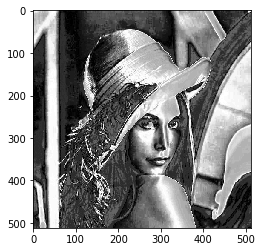

In [37]:
#какая разница между разницей абсолютной и разницей по модулю с точки зрения получаемого результата(?) 
diff = cv2.absdiff(norm, equal)
plt.imshow(diff, 'gray')

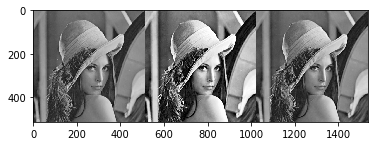

In [33]:
res = np.hstack((lena_gray, equal, norm)) #stacking images side-by-side
plt.imshow(res, 'gray')

**3. (5 баллов)** Реализуйте функцию добавления шума «соль и перец» для одноканального изображения. Входные параметры: $src$ – исходная одноканальная матрица $Mat$, $p$ – вероятность замещения исходных значений на $0$, $q$ – вероятность замещения исходных значений на $255$. Загрузите изображение $lena.jpg$, выделите каналы изображения в отдельные матрицы ($split$), добавьте шум «соль и перец» в каждый канал при помощи реализованной Вами функции с параметрами

1. $p=q=0.05$
2. $p=q=0.1$
3. $p=q=0.15$

In [7]:
def salt_pepper(image, p, q):
    pass
    output = np.zeros(image.shape,np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < p: 
                output[i][j] = 0 
                
            elif rdn > 1 - q: 
                output[i][j] = 255
                
            else:
                output[i][j] = image[i][j]           
    return output

In [8]:
r,b,g = cv2.split(lena)

r1 = salt_pepper(r, p=0.05, q=0.05)
b1 = salt_pepper(b, p=0.05, q=0.05)
g1 = salt_pepper(g, p=0.05, q=0.05)

r2 = salt_pepper(r, p=0.1, q=0.1)
b2 = salt_pepper(b, p=0.1, q=0.1)
g2 = salt_pepper(g, p=0.1, q=0.1)

r3 = salt_pepper(r, p=0.15, q=0.15)
b3 = salt_pepper(b, p=0.15, q=0.15)
g3 = salt_pepper(g, p=0.15, q=0.15)

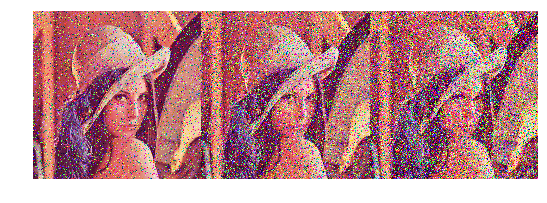

In [31]:
lena1 = cv2.merge([g1,b1,r1])
lena2 = cv2.merge([g2,b2,r2])
lena3 = cv2.merge([g3,b3,r3])

res = np.hstack((lena1, lena2, lena3))
show(res, size=7)

**4. (5 баллов)** Удалите диагональные полоски с изображения $lena\_diagonal.jpg$. Вычислите среднеквадратичную ошибку (mean squared error, $MSE$) для полученного результата и изображения $lena\_gray\_512.tif$. Задача будет засчитана при $MSE < 1500$. Тот, у кого по результатам проверки будет наименьшее значение MSE среди всех студентов для этой задачи, получит призовую шоколадку (раньше мы раздавали призовые баллы, но теперь у нас концепция фиксированного максимального количества баллов)

In [10]:
#для вывода чб, чтоб было проще дальше
def show_gray(img, size=1):
    plt.figure(figsize=(size,size))
    ax = plt.axes([0,0,1,1], frameon=False)
    ax.set_axis_off()
    plt.imshow(img, 'gray')

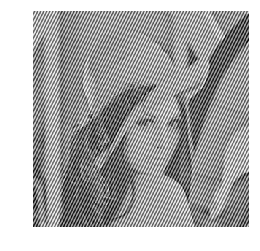

In [11]:
#help: http://scipy-lectures.org/intro/scipy/auto_examples/solutions/plot_fft_image_denoise.html
#преобразование фурье!!!

img = cv2.imread("lena_diagonal.jpg",0)
show_gray(img, size=3)

im_fft = np.fft.fft2(img)

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.12

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

im_new = np.fft.ifft2(im_fft2).real


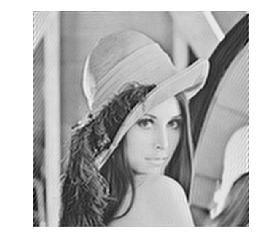

In [12]:
show_gray(im_new,size=3)

In [13]:
lena = cv2.imread("lena_gray_512.tif")
lena=cv2.cvtColor(lena, cv2.COLOR_RGB2GRAY)
mse = ((im_new - lena) ** 2).mean()
mse

923.8399751766859

**5. (5 баллов)** Подавите шум на изображении $lena\_color\_512\_noise.tif$. Вычислите среднеквадратичную ошибку ($MSE$) для полученного результата и изображения $lena\_color\_512.tif$. Задача будет засчитана при $MSE < 150$. Тот, у кого по результатам проверки будет наименьшее значение $MSE$ среди всех студентов для этой задачи, получит призовую шоколадку.

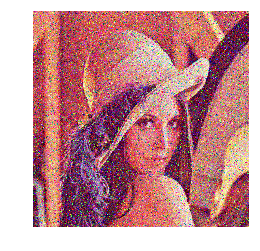

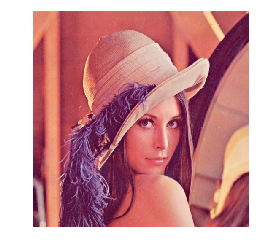

In [14]:
img = cv2.imread("lena_color_512-noise.tif")
lena = cv2.imread("lena_color_512.tif")
show(img, size=3)
show(lena, size=3)

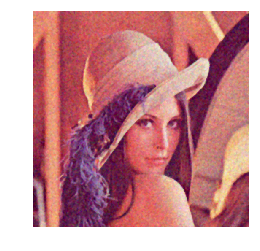

In [15]:
median = cv2.medianBlur(img, 5)
show(median, size=3)

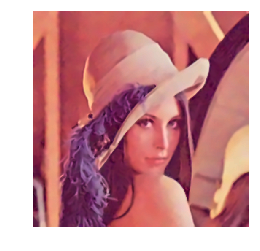

In [16]:
heh = cv2.fastNlMeansDenoisingColored(median,None,8,9,9,21)
show(heh, size=3)

In [17]:
mse = ((heh - lena) ** 2).sum(axis=2).mean()
mse

133.17836380004883

**6. (5 баллов)** Выделите в изображении $table.jpg$ границы таблицы с использованием морфологических операций. Результатом обработки должно быть изображение, в котором удален весь текст и оставлены только границы таблицы

In [18]:
#help: https://docs.opencv.org/3.4/dd/dd7/tutorial_morph_lines_detection.html
gray = cv2.imread("table.jpg",0)
gray = cv2.bitwise_not(gray)
bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                          cv2.THRESH_BINARY, 15, -2)

In [19]:
horizontal = np.copy(bw)
vertical = np.copy(bw)
# Specify size on horizontal axis
cols = horizontal.shape[1]
horizontal_size = cols / 30
# Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
# Apply morphology operations
horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.dilate(horizontal, horizontalStructure)

In [20]:
# Specify size on vertical axis
rows = vertical.shape[0]
verticalsize = rows / 30
# Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))
# Apply morphology operations
vertical = cv2.erode(vertical, verticalStructure)
vertical = cv2.dilate(vertical, verticalStructure)

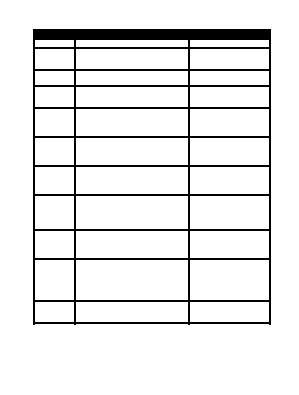

In [21]:
rs = vertical+horizontal
rs = cv2.bitwise_not(rs)
edges = cv2.adaptiveThreshold(rs, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                                cv2.THRESH_BINARY, 3, -9)
kernel = np.ones((3, 3), np.uint8)
edges = cv2.dilate(edges, kernel)
edges = cv2.bitwise_not(edges)
edges = cv2.morphologyEx(edges, cv2.MORPH_DILATE, kernel, iterations=1)
edges = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel, iterations=5)

show_gray(edges, size=5)

**7. (5 баллов)** Отделите монеты от фона на изображении $coins\_1.jpg$, отсортируйте монеты по убыванию размера. Сгенерируйте результирующее изображение с цветной разметкой областей, соответствующих монетам на исходном изображении: на черном фоне должны быть выделены разными цветами области, соответствующие монетам. В центре каждой выделенной области разместите порядковый номер монеты в соответствии с сортировкой монет по размеру (в центре области, соответствующей самой большой монете, должно стоять число 1)

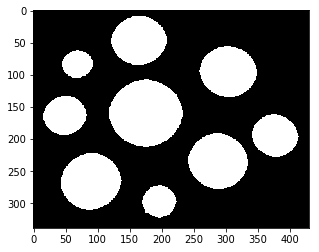

In [22]:
img = cv2.imread("coins_1.jpg",0)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
mask = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
ret,thresh4 = cv2.threshold(mask,60,255,cv2.THRESH_BINARY)
kernel = np.ones((7, 7), np.uint8)
edges = cv2.erode(thresh4, kernel)
#edges = cv2.bitwise_not(edges)
plt.imshow(edges, 'gray')

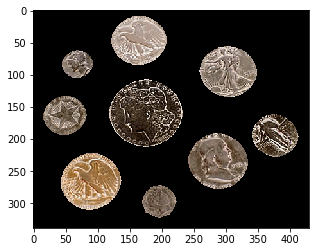

In [23]:
coins_2 = cv2.imread("coins_1.jpg")
[r,g,b] = cv2.split(coins_2)
r = cv2.subtract(edges, r)
g = cv2.subtract(edges, g)
b = cv2.subtract(edges, b)
re = cv2.merge([r,g,b])
plt.imshow(re)

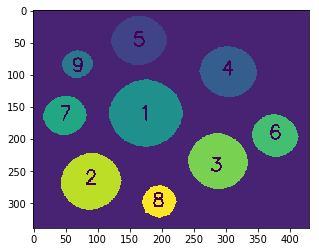

In [24]:
#help: https://docs.opencv.org/3.1.0/dc/da5/tutorial_py_drawing_functions.html

# Marker labelling
re = cv2.cvtColor(re, cv2.COLOR_BGR2GRAY)
ret, markers = cv2.connectedComponents(re)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+10
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(markers,'1',(165,170), font, 1 ,(9,80),2,cv2.LINE_AA)
cv2.putText(markers,'2',(80,270), font, 1 ,(9,80),2,cv2.LINE_AA)
cv2.putText(markers,'3',(275,250), font, 1 ,(9,80),2,cv2.LINE_AA)
cv2.putText(markers,'5',(155,55), font, 1 ,(9,80),2,cv2.LINE_AA)
cv2.putText(markers,'4',(293,100), font, 1 ,(9,80),2,cv2.LINE_AA)
cv2.putText(markers,'6',(367,200), font, 1 ,(9,80),2,cv2.LINE_AA)
cv2.putText(markers,'7',(40,170), font, 1 ,(9,80),2,cv2.LINE_AA)
cv2.putText(markers,'8',(185,305), font, 1 ,(9,80),2,cv2.LINE_AA)
cv2.putText(markers,'9',(60,95), font, 1 ,(9,100),2,cv2.LINE_AA)

plt.imshow(markers)

**8. (5 баллов)** Отделите монеты от текста на изображении $coins\_2.jpg.$ Сгенерируйте по входному изображению два изображения: на одном должны остаться только монеты, весь текст должен быть удален; на втором изображении должен остаться только текст, все монеты должны быть удалены.

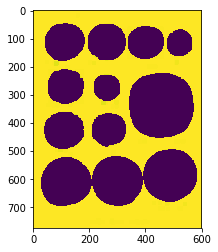

In [25]:
im = cv2.imread("coins_2.jpg",0)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6, 6))
mask = cv2.morphologyEx(im, cv2.MORPH_CLOSE, kernel)
ret,thresh4 = cv2.threshold(mask,243,255,cv2.THRESH_TOZERO)
kernel = np.ones((7, 7), np.uint8)
edges = cv2.erode(thresh4, kernel)
kernel2 = np.ones((5, 5), np.uint8)
edges = cv2.erode(edges, kernel2)
plt.imshow(edges)

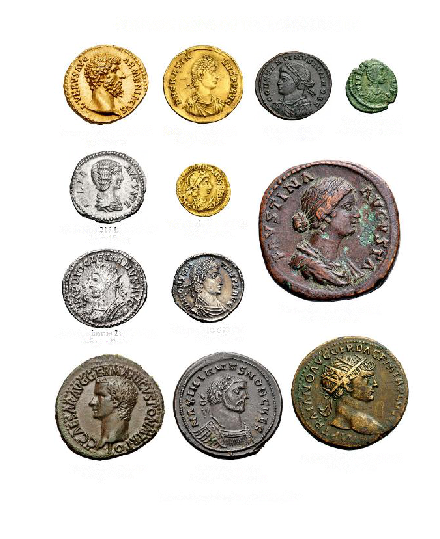

In [26]:
coins_2 = cv2.imread("coins_2.jpg")
xxx = cv2.inpaint(coins_2, edges, 15, cv2.INPAINT_NS)
res = coins_2 | xxx
show(res, size=7)

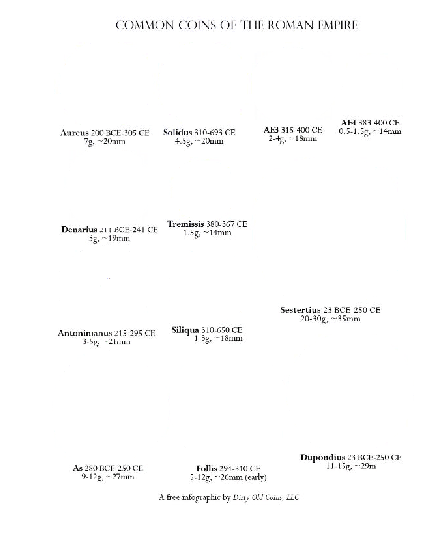

In [27]:
diff = cv2.subtract(res, coins_2)
diff = cv2.bitwise_not(diff)
show(diff, size=7)

### Сравнение глобальных признаков 

Для задач 9 и 10 надо реализовать общую функцию, которая принимет на вход:

* список дескрипторов (**id**, и сам дескриптор) 
* количество максимально похожих для вывода **n**
* функцию сранения дескрипторов

и отдает **n** пар **id** максимально похожих изображений.

**9. (9 баллов)** Посмотрите на изображения в папке *Coral*. Посчитайте гистограммы изображений. Выведите на экран 20 пар изображений с максимально похожими гистограммами. В этом задании надо попробовать:
* различные цветовые пространства (RGB, HSV, CIELab)
* различные способы разбиения на бины (разное количество для каждой характеристики)
* различные метрики сравнения $L_2$, $\chi^2$, пересечение гистограм

**10. (10 баллов)** Посмотрите на изображения в папке *leaves*. Посчитайте дескрипторы Фурье для каждого листочка изображений. Выведите на экран 20 пар изображений с максимально похожими дескрипторами.